##Importações e Carregando df

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [167]:
coaster_df = pd.read_csv('./coaster_db.csv')

##Entendendo o DF

In [168]:

coaster_df.shape

(1087, 56)

In [169]:
coaster_df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [170]:
#Aqui fica claro que existem varias colunas duplicadas e redundantes
coaster_df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [171]:
#Podemos observar que alguns dados estão em tipos inadequados
#EX opening_date_clean  está como object e deveria ser datetime
coaster_df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [172]:
coaster_df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


##Preparação dos Dados

In [173]:
#EXCLUINDO COLUNAS REDUNDANTES OU DESNECESSÁRIAS
coaster_df = coaster_df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened',
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']]

In [174]:
coaster_df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [175]:
#Convertendo a coluna para seu tipo correto
coaster_df['opening_date_clean'] = pd.to_datetime(coaster_df['opening_date_clean'])

<ipython-input-175-716408e66798>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coaster_df['opening_date_clean'] = pd.to_datetime(coaster_df['opening_date_clean'])


In [176]:
coaster_df = coaster_df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [177]:
coaster_df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [178]:
#Procura colunas duplicadas
coaster_df.loc[coaster_df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [179]:
#Procura Montanhas russas com o Nome duplicado
duplicadas = coaster_df.loc[coaster_df.duplicated(subset='Coaster_Name')].copy()

In [180]:
coaster_df.query('Coaster_Name =="Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [181]:
coaster_df = coaster_df.loc[~coaster_df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True)

In [182]:
coaster_df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


##Entendendo Características

In [183]:
coaster_df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Contagem')

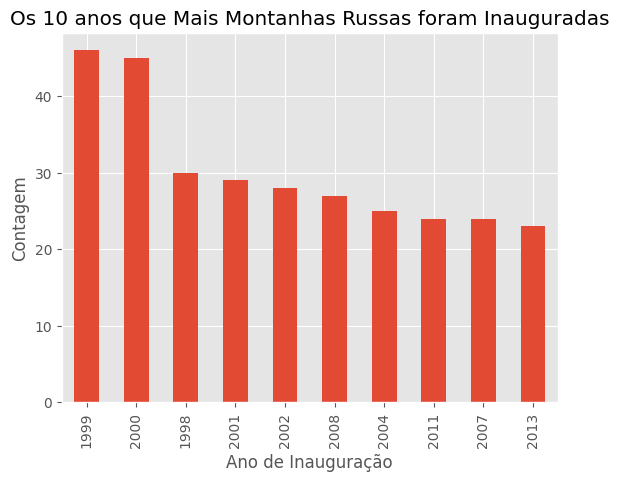

In [184]:
ax = coaster_df['Year_Introduced'].value_counts().head(10) \
.plot(kind='bar', title='Os 10 anos que Mais Montanhas Russas foram Inauguradas')
ax.set_xlabel('Ano de Inauguração')
ax.set_ylabel('Contagem')

<Axes: xlabel='Year_Introduced', ylabel='Count'>

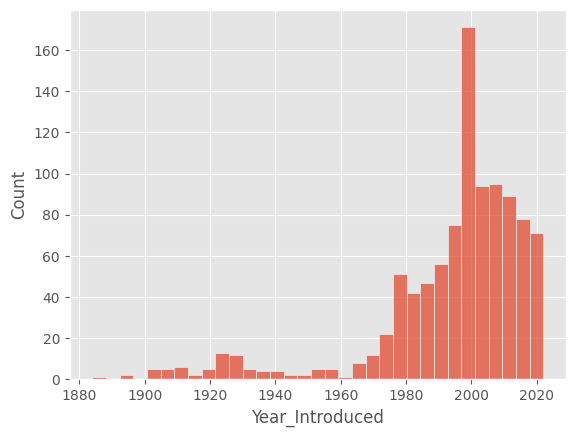

In [185]:
sns.histplot(coaster_df['Year_Introduced'])

In [186]:
coaster_df['Speed_mph'] = coaster_df['Speed_mph'].apply(lambda x: round(x * 1.60934) if not pd.isna(x) else x)

In [187]:
coaster_df['Speed_mph']

0       10.0
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
985     84.0
986     80.0
987    117.0
988     55.0
989     93.0
Name: Speed_mph, Length: 990, dtype: float64

Text(0.5, 0, 'Velocidade(Km/H)')

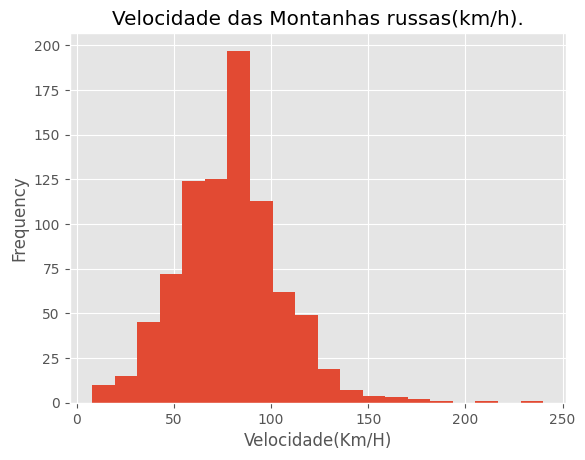

In [188]:
ax = coaster_df['Speed_mph'].plot(kind='hist', bins=20, title='Velocidade das Montanhas russas(km/h).')
ax.set_xlabel('Velocidade(Km/H)')

Text(0.5, 0, 'Velocidade(Km/H)')

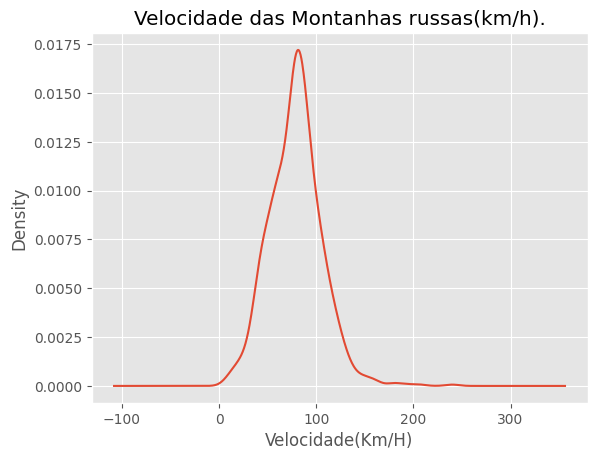

In [189]:
ax = coaster_df['Speed_mph'].plot(kind='kde',
                                  title='Velocidade das Montanhas russas(km/h).')
ax.set_xlabel('Velocidade(Km/H)')

In [190]:
coaster_df['Type_Main'].value_counts()

Steel    728
Wood     191
Other     71
Name: Type_Main, dtype: int64

Text(0, 0.5, 'Contagem')

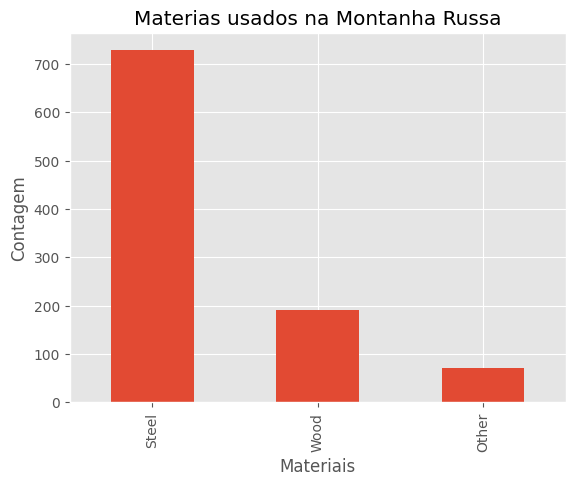

In [191]:
ax= coaster_df['Type_Main'].value_counts().plot(kind='bar',
                                            title='Materias usados na Montanha Russa')
ax.set_xlabel('Materiais')
ax.set_ylabel('Contagem')

##Correlações Entre as Características

<Axes: title={'center': 'Montanha Russa Altura(ft) x Velocidade(km/h)'}, xlabel='Speed_mph', ylabel='Height_ft'>

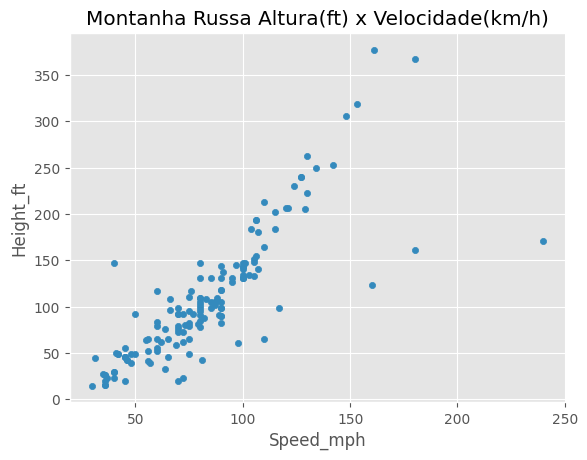

In [195]:
coaster_df.plot(kind='scatter',
                x='Speed_mph',
                y='Height_ft',
                title='Montanha Russa Altura(ft) x Velocidade(km/h)')

Text(0, 0.5, 'Altura(ft)')

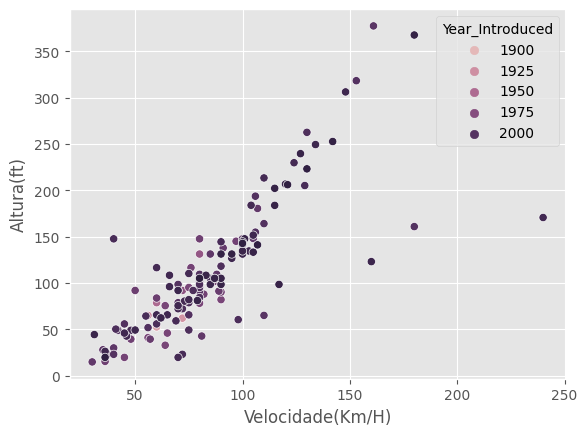

In [194]:
#Observa-se no gráfico que a altura e a velocidade tendem a crescer proporcionalmente
ax = sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=coaster_df)
ax.set_xlabel('Velocidade(Km/H)')
ax.set_ylabel('Altura(ft)')

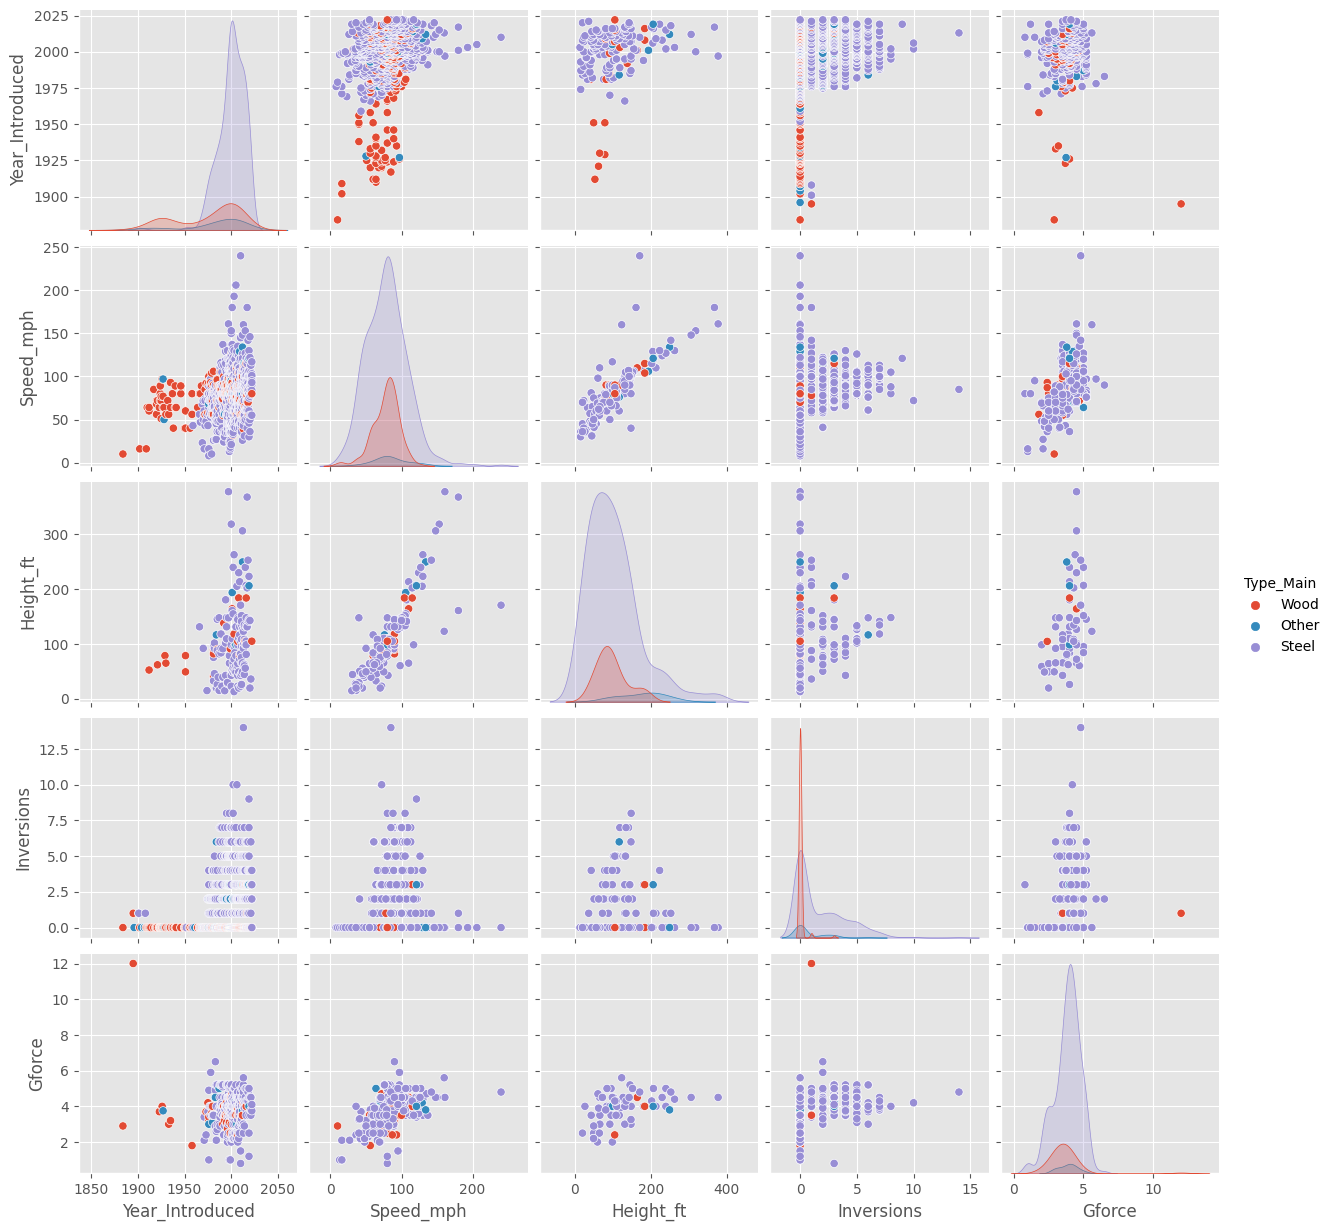

In [196]:
sns.pairplot(coaster_df,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
             hue='Type_Main')

In [197]:
df_corr = coaster_df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()

In [199]:
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.170971,0.135413,-0.209887,0.160247
Speed_mph,0.170971,1.000000,0.734044,-0.027758,0.607374
Height_ft,0.135413,0.734044,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.027758,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607374,0.466482,0.275991,1.000000


<Axes: >

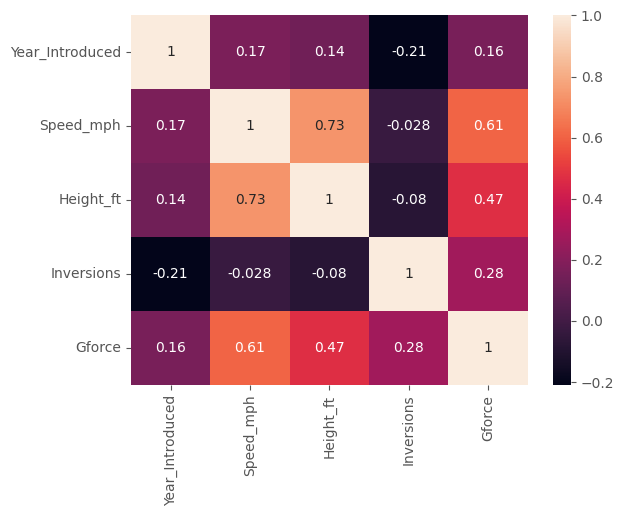

In [202]:
sns.heatmap(df_corr, annot=True)

##Respondendo Questões com a análise de dados.

###Quais locais têm as montanhas russas com maiores alturas?

In [216]:
maiores_valores = coaster_df.iloc[coaster_df['Height_ft'].nlargest(10).index]

Text(0.5, 0, 'Altura(ft)')

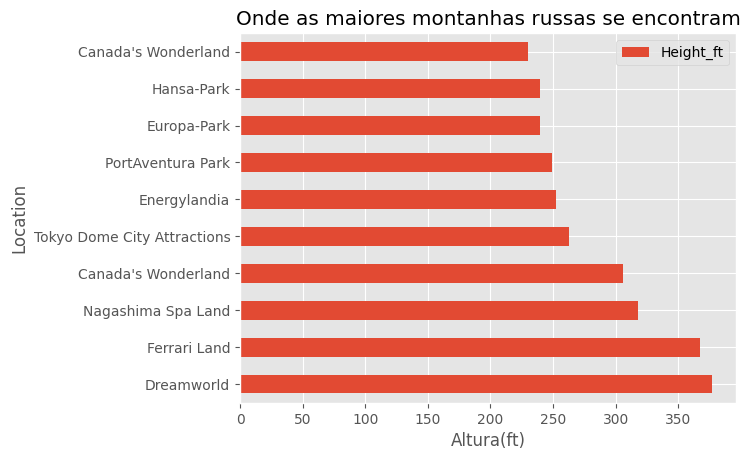

In [224]:
maiores_valores.plot(kind='barh',
                    x='Location',
                    y='Height_ft',
                    title='Onde as maiores montanhas russas se encontram') \
                    .set_xlabel('Altura(ft)')

###Mostre Locais que possuam pelo menos 10 montanhas russas e a velocidade média das montanhas russas nesse locas

In [233]:
ax = coaster_df.query('Location != "Other"')
ax = ax.groupby('Location')['Speed_mph'].agg(['mean', 'count']) \
     .query('count >= 10').sort_values('mean')['mean']

Text(0.5, 0, 'Velocidade media(Km/H)')

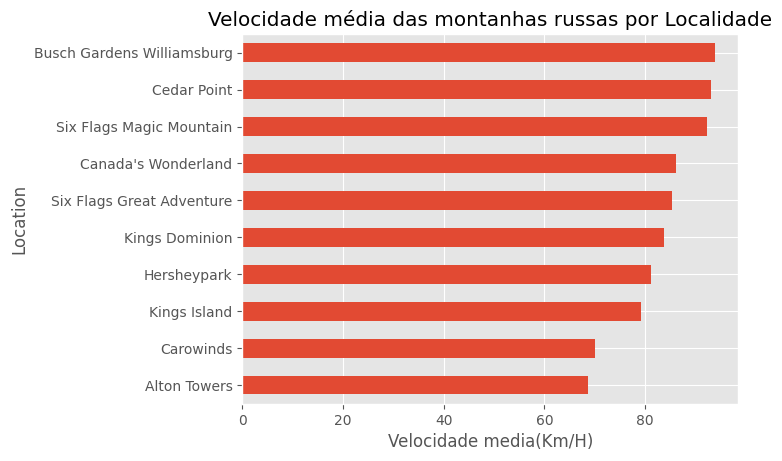

In [238]:
ax.plot(kind='barh',
        title='Velocidade média das montanhas russas por Localidade')\
        .set_xlabel('Velocidade media(Km/H)')